## Pre-Emphasis Filter

In [ ]:
import data_analysis.plotting as plot
import matplotlib.pyplot as plt
import data_loader
import numpy as np
import preprocessing.utils as preprocess
from tqdm import tqdm
import preprocessing.utils as utility

In [2]:
data = data_loader.SpeechPairLoader(r'data_preparation/output.csv')
signal,sf,coeff = data[0][0],data[0][1],0.97
signal_cont,sf_cont = data[0][2],data[0][3]
filtered_signal = preprocess.pre_emphasis_filter(signal,coeff)

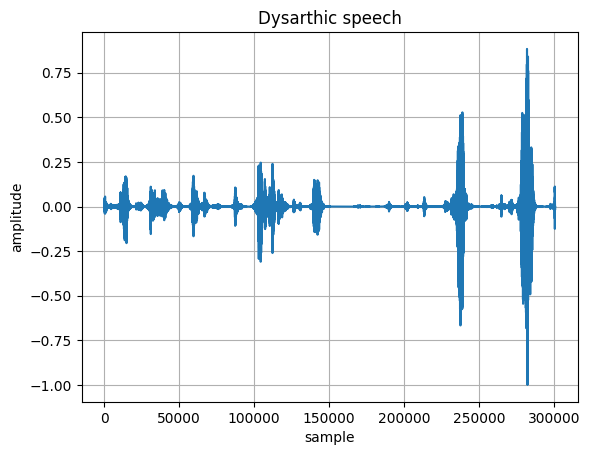

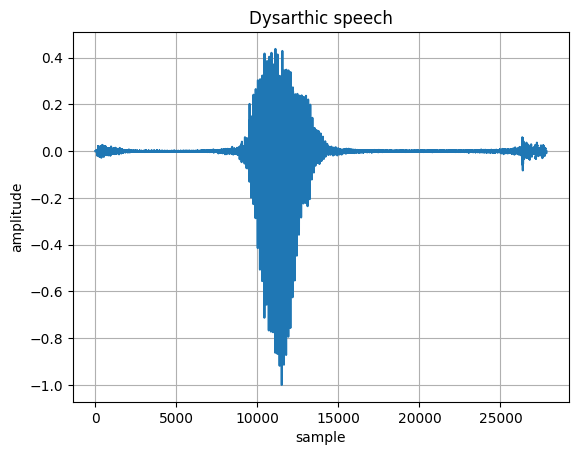

In [3]:
plt.figure()
plt.title('Dysarthic speech')
plt.plot(signal)
plt.grid()
plt.xlabel('sample')
plt.ylabel('amplitude')
plt.show()
plt.figure()
plt.title('Controlled speech')
plt.plot(signal_cont)
plt.grid()
plt.xlabel('sample')
plt.ylabel('amplitude')
plt.show()

In [4]:
signal_pre = utility.pre_emphasis_filter(signal)
signal_cont_pre = utility.pre_emphasis_filter(signal_cont)

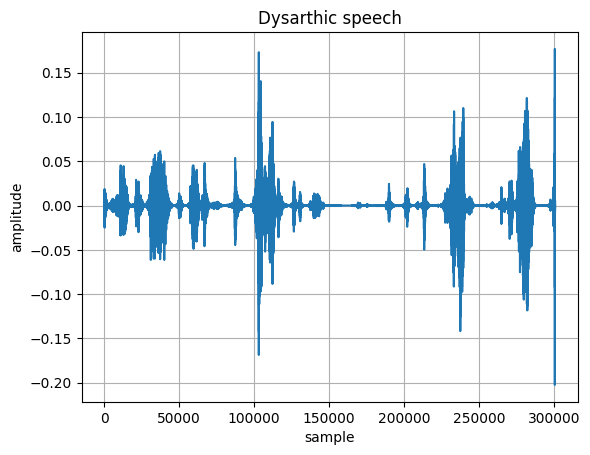

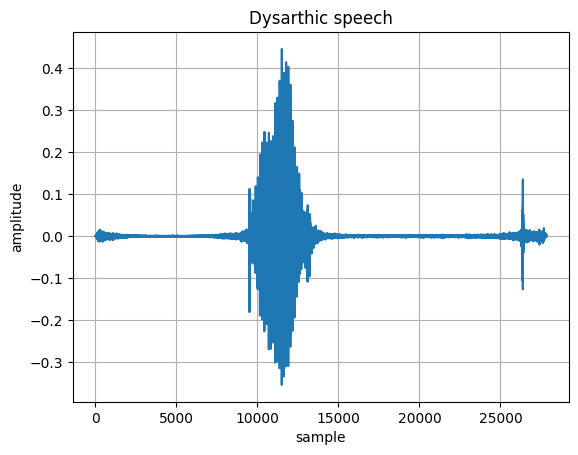

In [5]:
plt.figure()
plt.title('Dysarthic speech')
plt.plot(signal_pre)
plt.grid()
plt.xlabel('sample')
plt.ylabel('amplitude')
plt.show()
plt.figure()
plt.title('Dysarthic speech')
plt.plot(signal_cont_pre)
plt.grid()
plt.xlabel('sample')
plt.ylabel('amplitude')
plt.show()

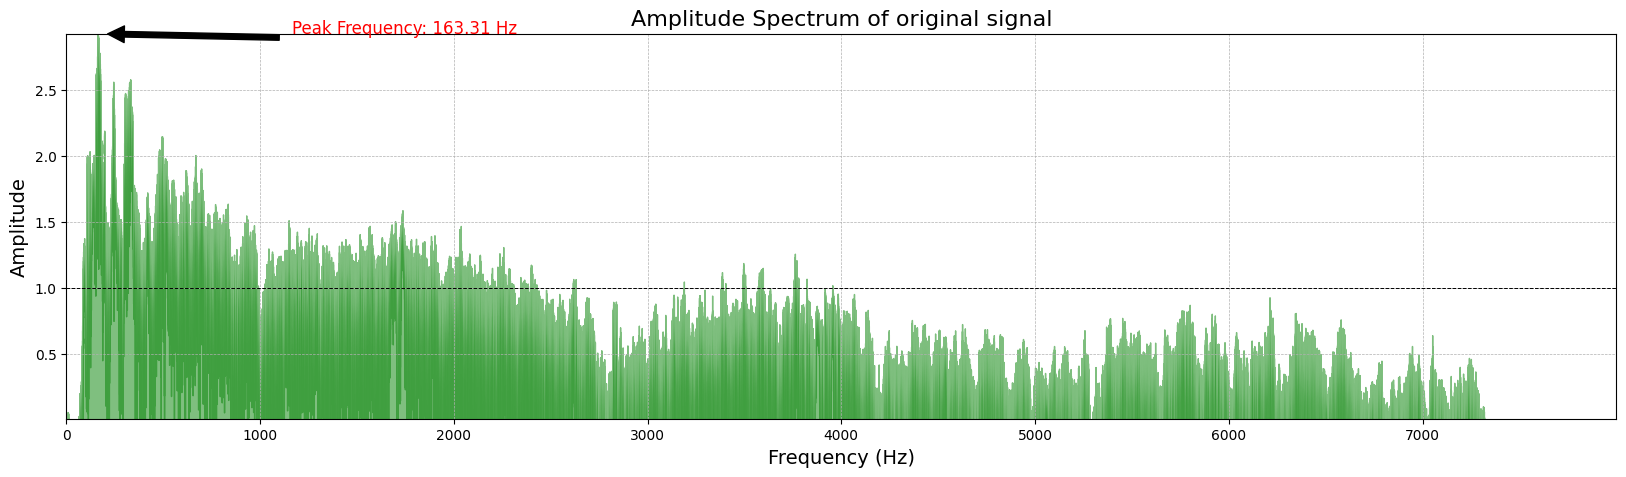

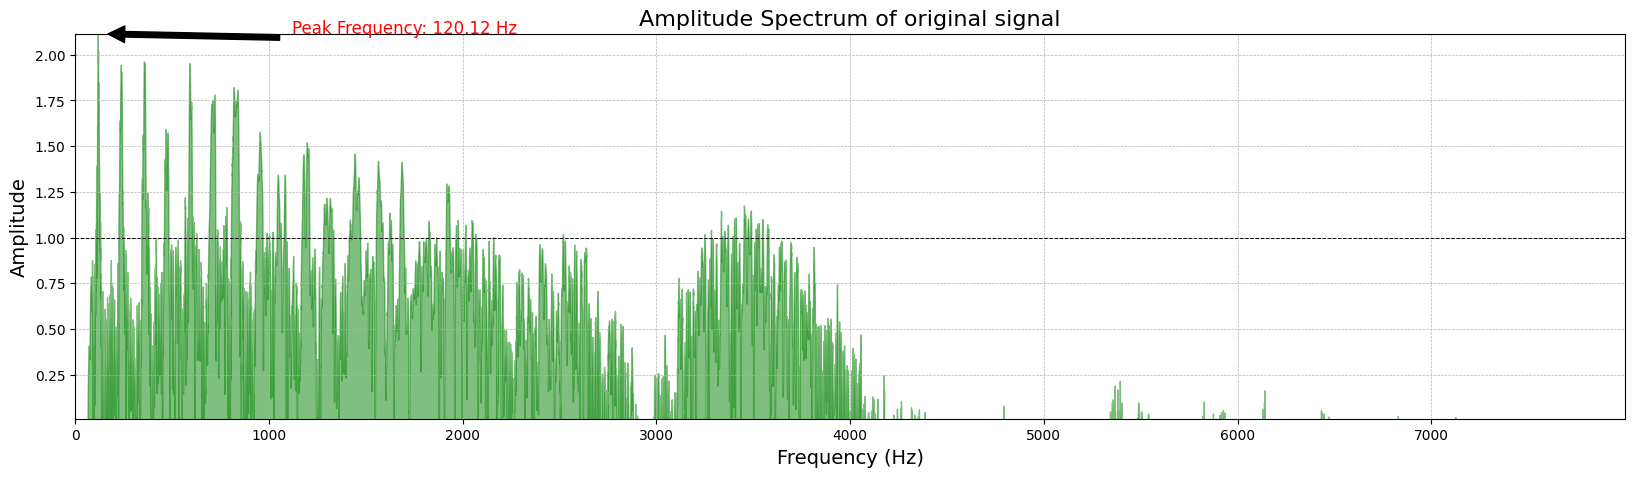

In [6]:
plot.plot_power_spectrum_log(signal,sf,colour="green",title="Amplitude Spectrum of original signal")
plot.plot_power_spectrum_log(signal_cont,sf,colour="green",title="Amplitude Spectrum of original signal")

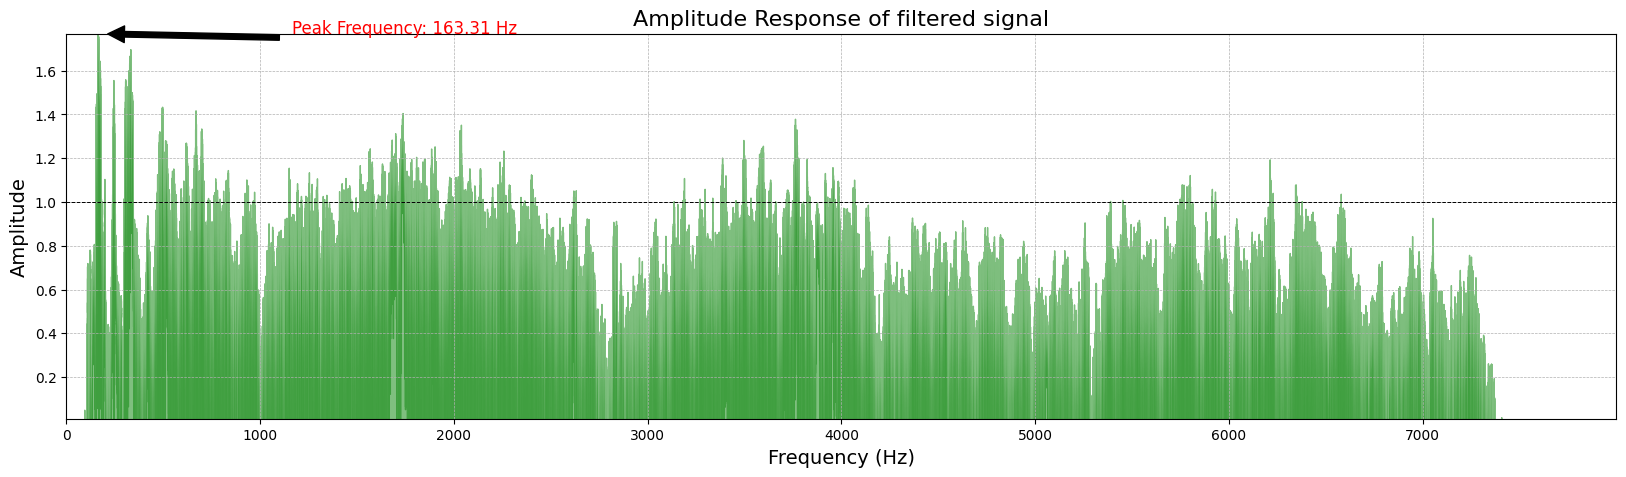

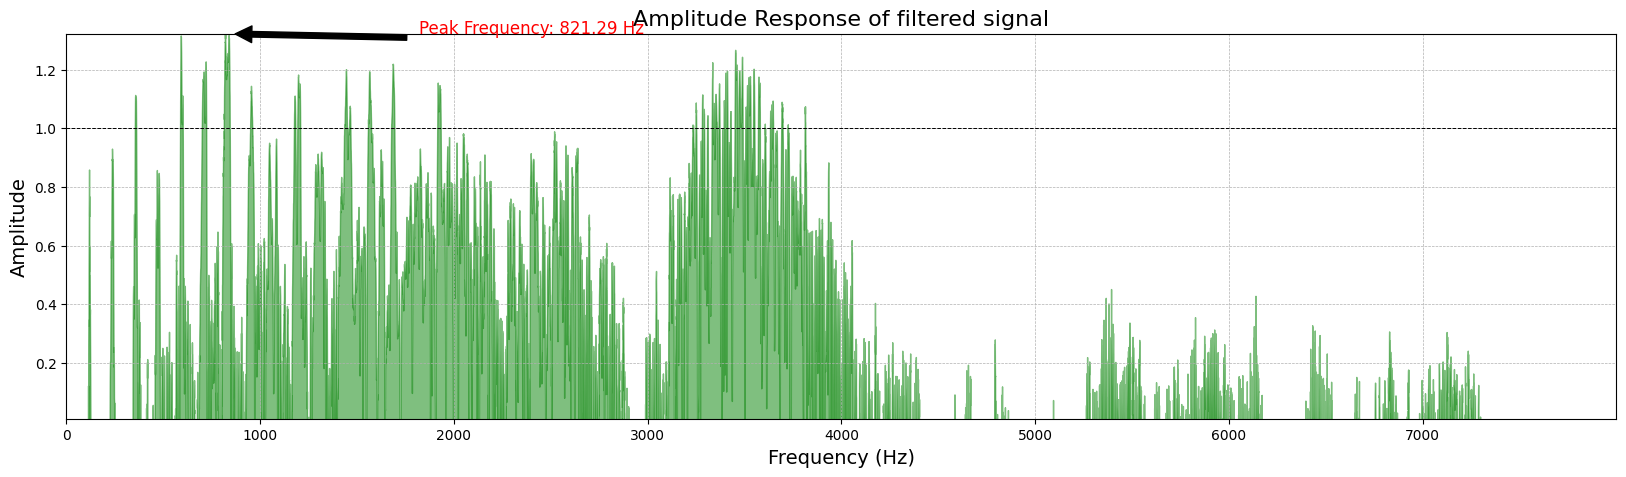

In [7]:
plot.plot_power_spectrum_log(signal_pre,sf,colour="green",title="Amplitude Response of filtered signal")
plot.plot_power_spectrum_log(signal_cont_pre,sf,colour="green",title="Amplitude Response of filtered signal")

In [8]:
def plot_signal_frames(signal_frames):
    """
    Creates a 4x4 subplot to plot the first 16 frames from signal_frames.

    Parameters:
    signal_frames (ndarray): 2D array where each row represents a frame of the signal.
    """
    num_frames = signal_frames.shape[0]
    num_subplots = min(16, num_frames)  # Plot up to 16 frames or the total number of frames if less than 16

    fig, axs = plt.subplots(4, 4, figsize=(15, 10))
    fig.suptitle('Signal Frames', fontsize=16)

    for i in range(num_subplots):
        row = i // 4
        col = i % 4
        axs[row, col].plot(signal_frames[i, :])
        axs[row, col].set_title(f'Frame {i+1}')

    # Hide any unused subplots if the total number of frames is less than 16
    for i in range(num_subplots, 16):
        row = i // 4
        col = i % 4
        axs[row, col].axis('off')

    plt.tight_layout(rect=[0, 0, 1, 0.96])  # Adjust layout to make room for the title
    plt.show()


In [9]:
signal_frames = utility.frame(signal_pre,sf)
signal_cont_frame = utility.frame(signal_cont_pre,sf)

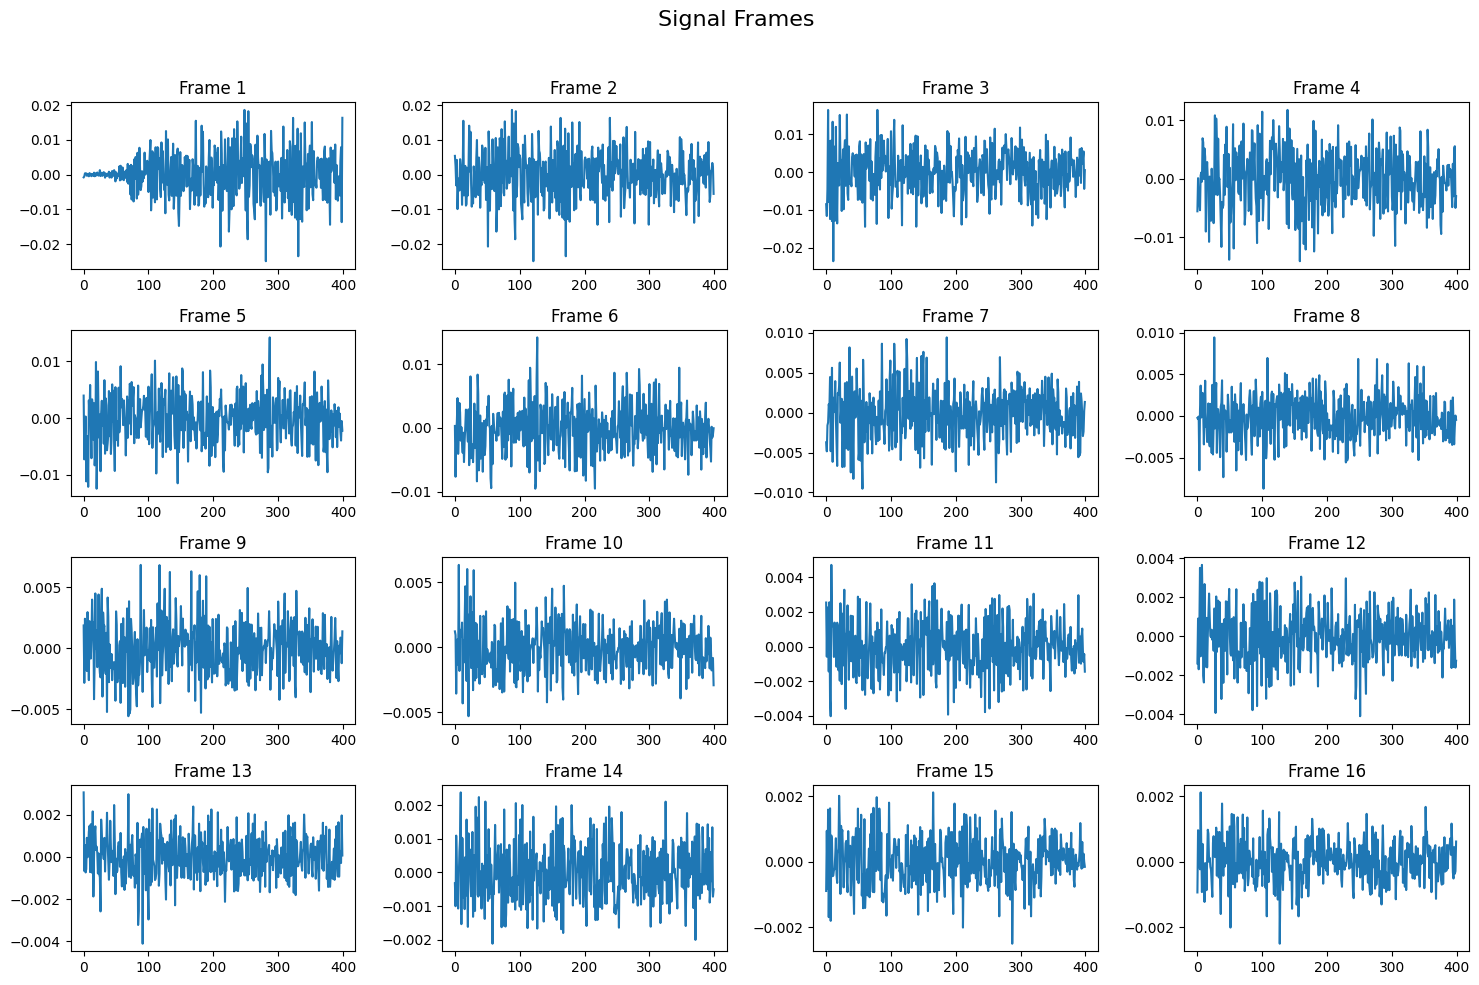

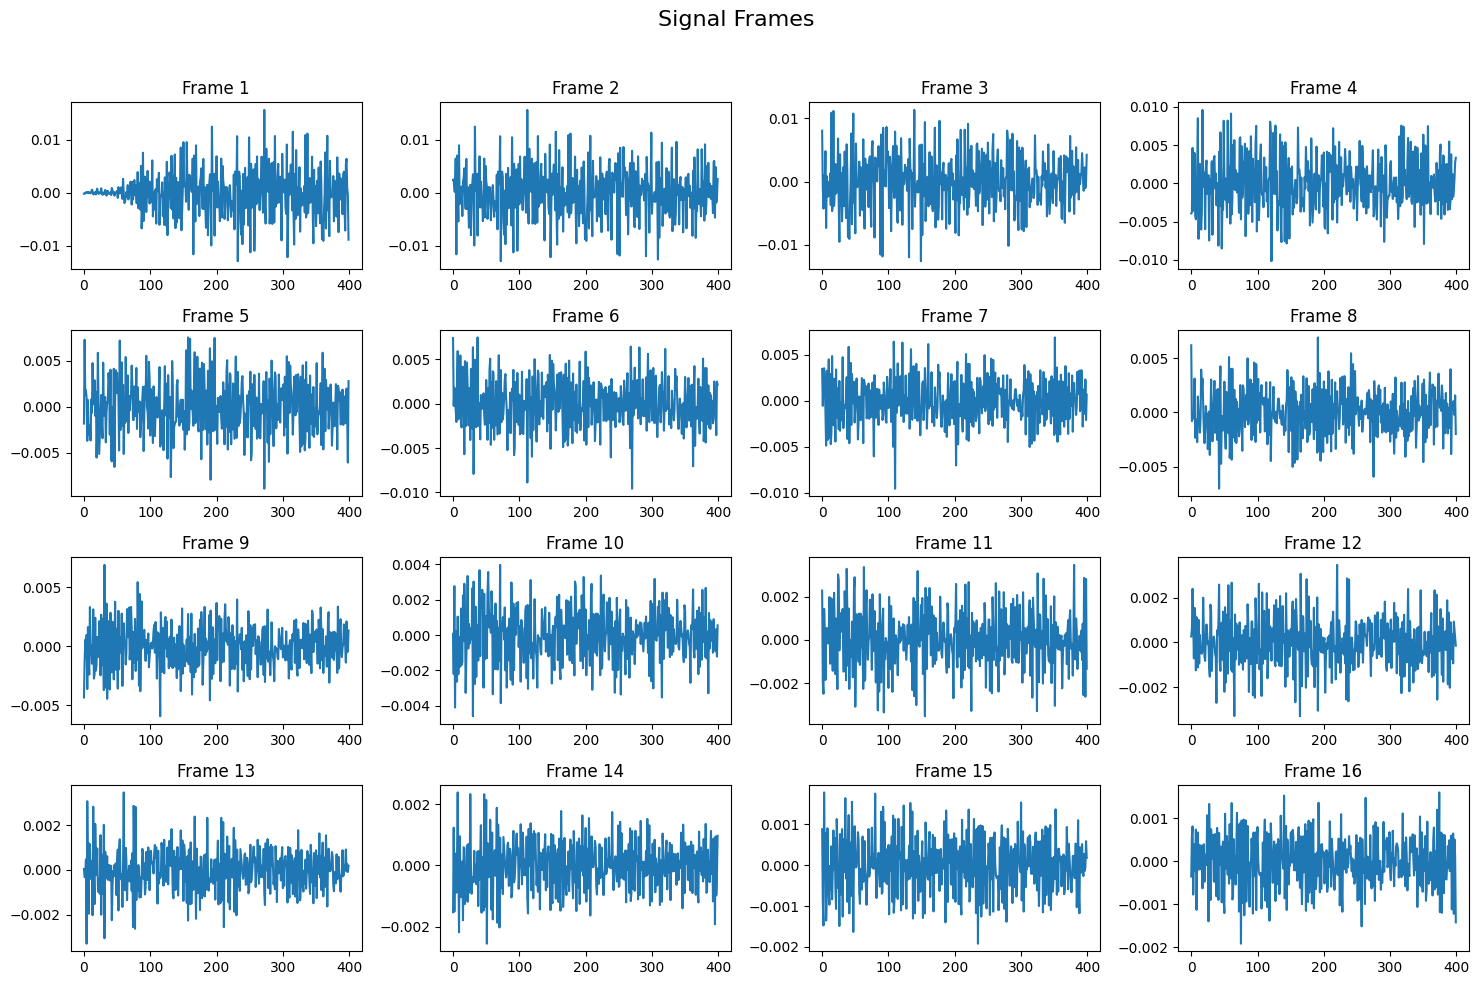

In [10]:
plot_signal_frames(signal_frames[0])
plot_signal_frames(signal_cont_frame[0])

In [11]:
signal_window = utility.windowing(signal_frames[0],signal_frames[1],np.hamming)
signal_cont_window = utility.windowing(signal_cont_frame[0],signal_cont_frame[1],np.hamming)

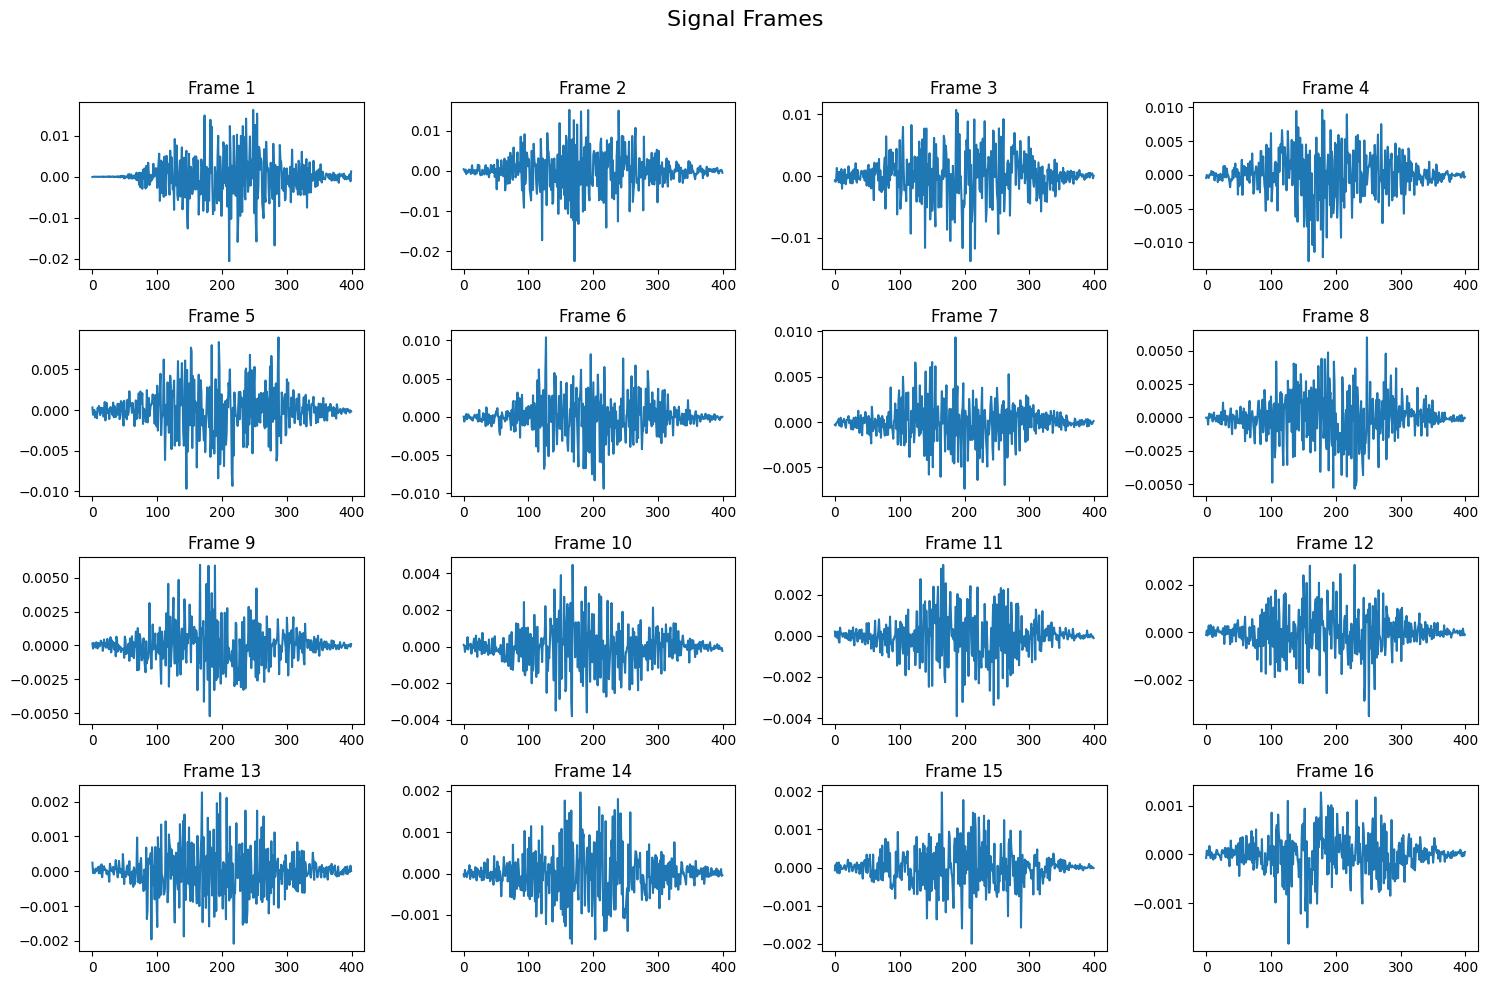

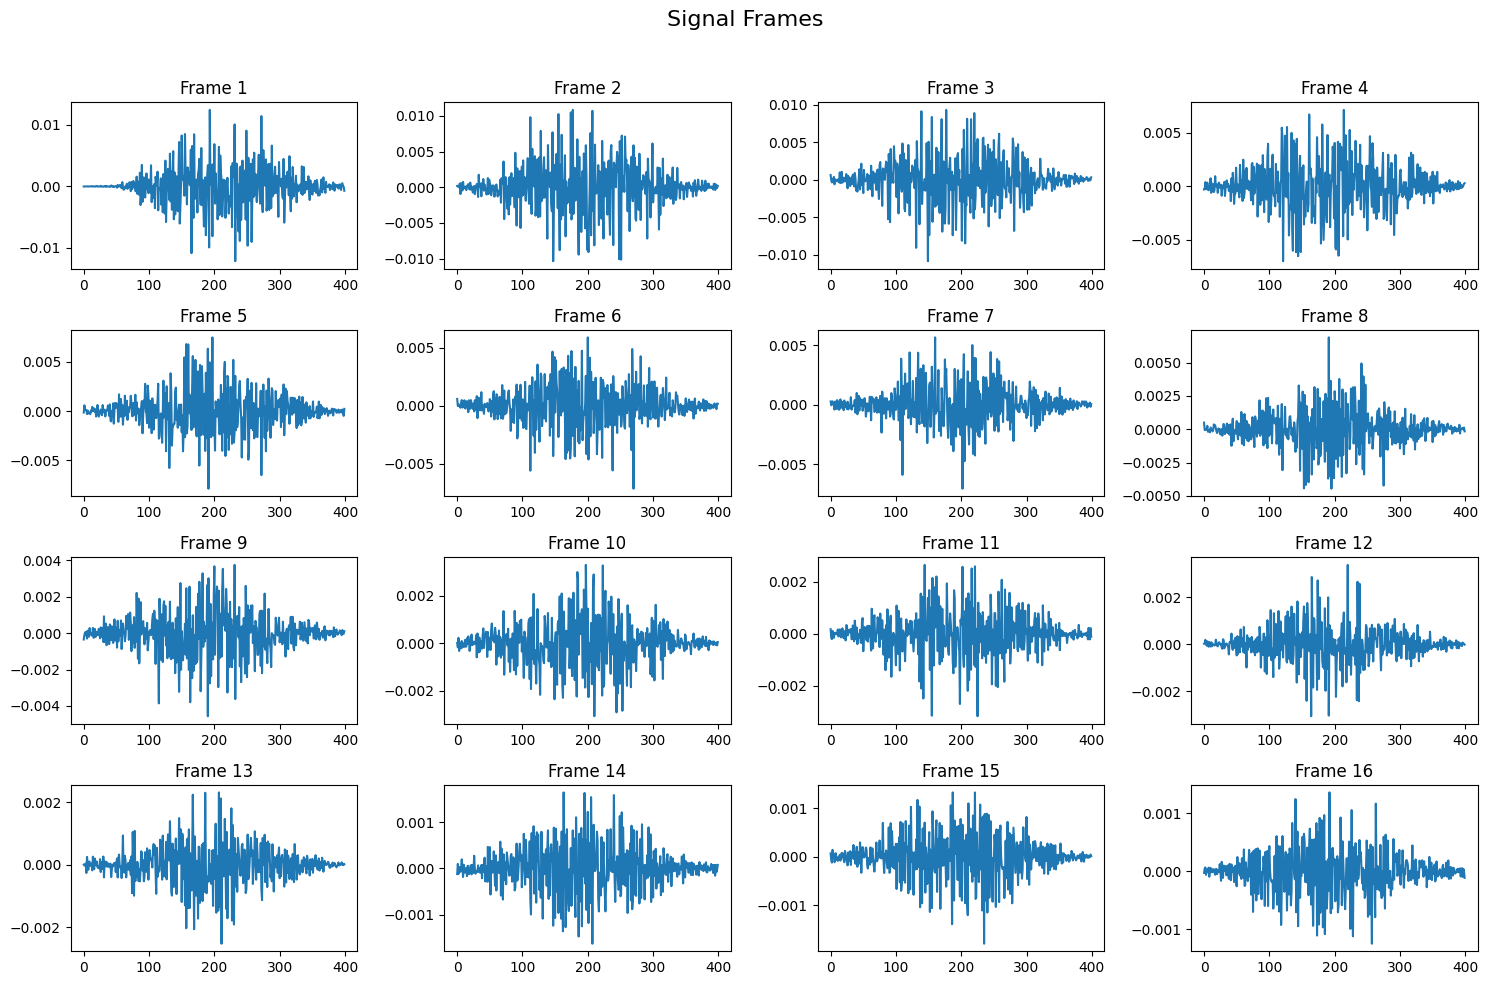

In [12]:
plot_signal_frames(signal_window)
plot_signal_frames(signal_cont_window)

## Amplitude and Phase Response 

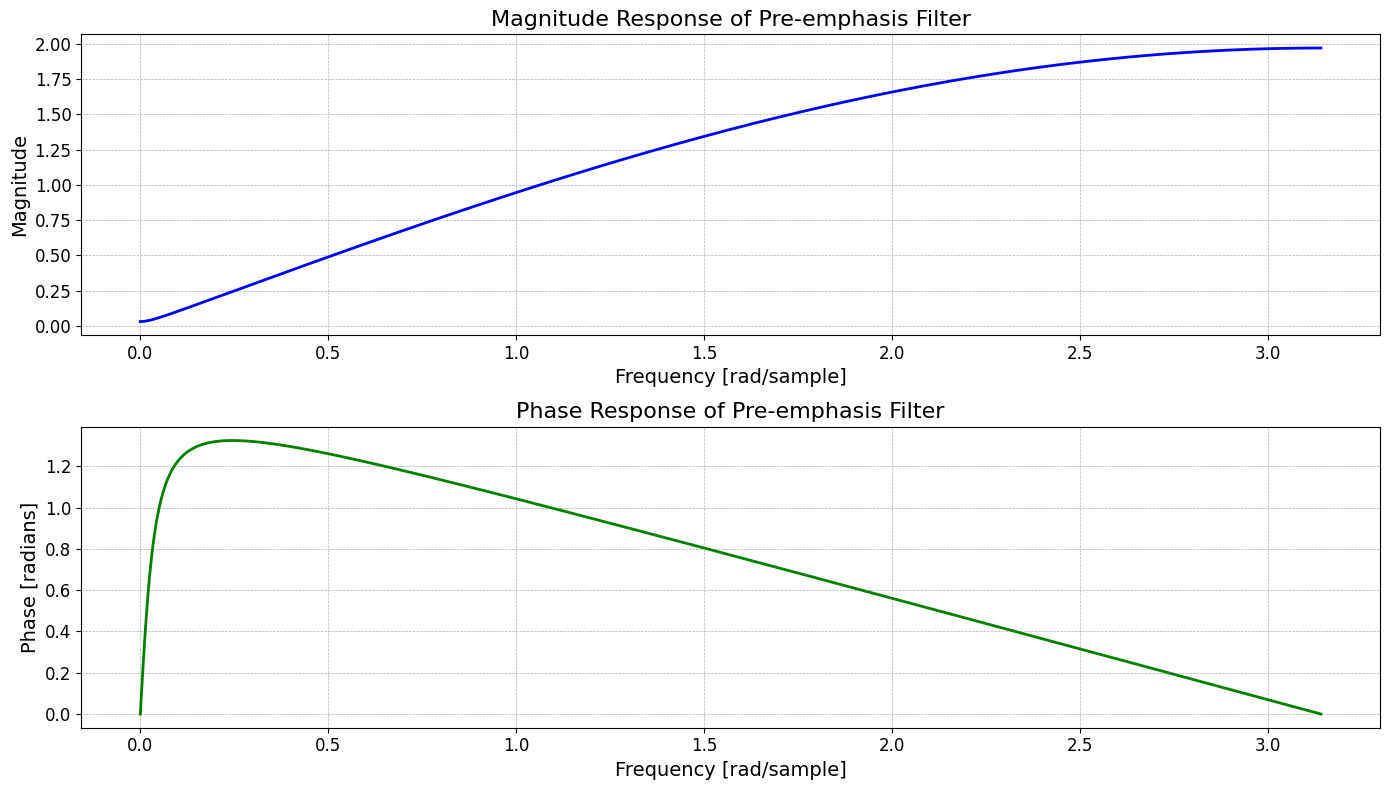

In [13]:
w = np.linspace(0, np.pi, 512)
H = 1 - coeff * np.exp(-1j * w)
H_magnitude = np.abs(H)
H_phase = np.angle(H)

plt.figure(figsize=(14, 8))

plt.subplot(2, 1, 1)
plt.plot(w, H_magnitude, color='blue', linewidth=2)
plt.title('Magnitude Response of Pre-emphasis Filter', fontsize=16)
plt.xlabel('Frequency [rad/sample]', fontsize=14)
plt.ylabel('Magnitude', fontsize=14)
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Plot phase response
plt.subplot(2, 1, 2)
plt.plot(w, H_phase, color='green', linewidth=2)
plt.title('Phase Response of Pre-emphasis Filter', fontsize=16)
plt.xlabel('Frequency [rad/sample]', fontsize=14)
plt.ylabel('Phase [radians]', fontsize=14)
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()


## Effect of windowing

In [14]:
emphasized_signal = utility.pre_emphasis_filter(signal)
framed_signal = utility.frame(emphasized_signal,sf)[0]
test_frame = framed_signal[0,:]

In [15]:
windowed = utility.windowing(test_frame,400,np.hamming)

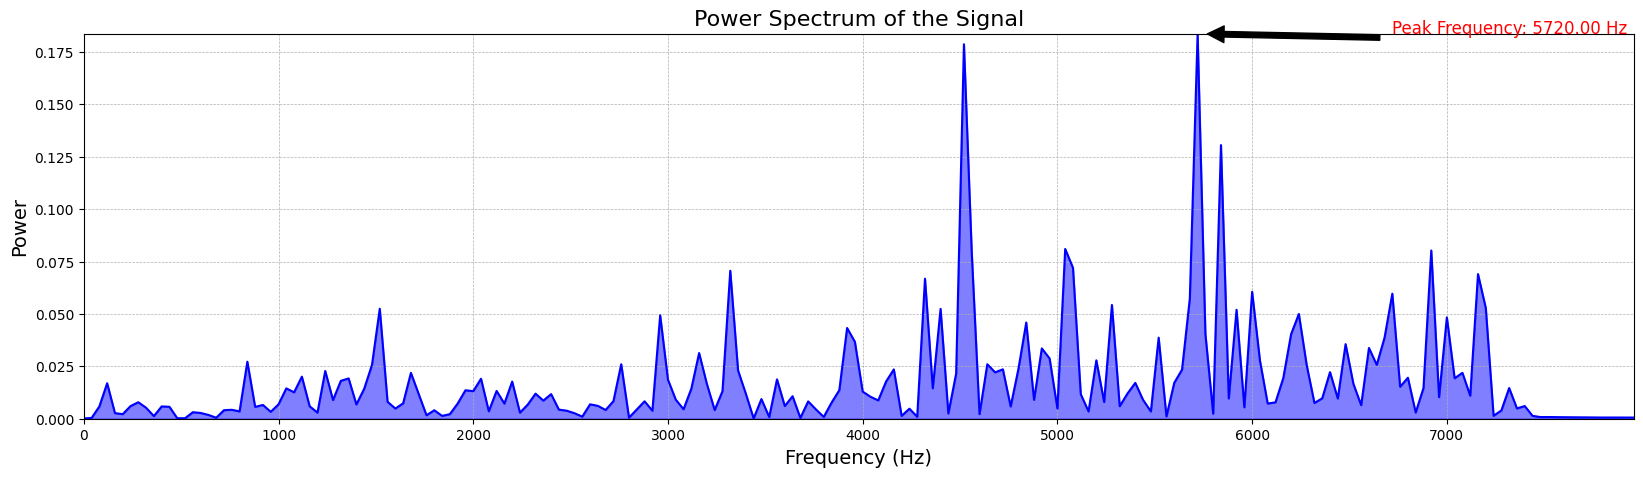

In [16]:
plot.plot_power_spectrum(test_frame)

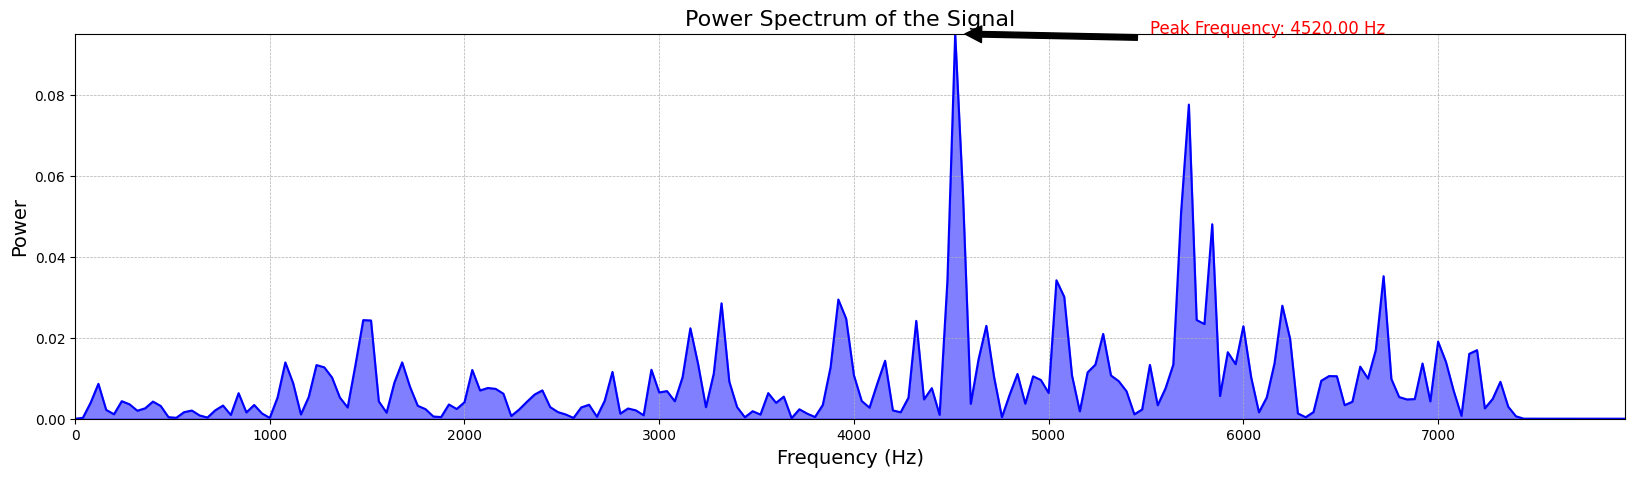

In [17]:
plot.plot_power_spectrum(windowed)

In [18]:
windowed_signal = utility.windowing(framed_signal,400,np.hamming)
spectogram = utility.fourier_transform(windowed_signal)

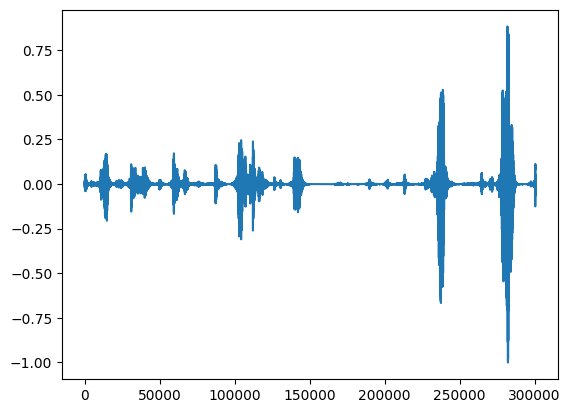

In [19]:
plt.plot(signal)

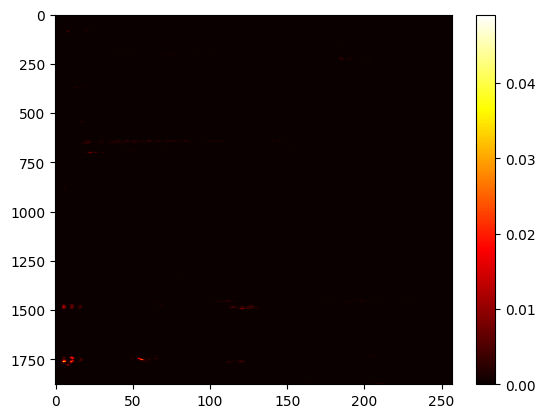

In [20]:
plt.figure()
plt.imshow(spectogram,aspect='auto',cmap='hot')
plt.colorbar()
plt.show()
plt.close()

In [21]:
filterbank = utility.mel_filter_bank(spectogram,sf)


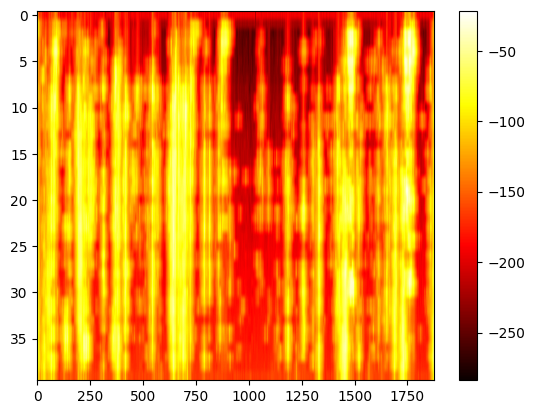

In [22]:

plt.figure()
plt.imshow(filterbank.T,aspect='auto',cmap='hot')
plt.colorbar()
plt.show()
plt.close()

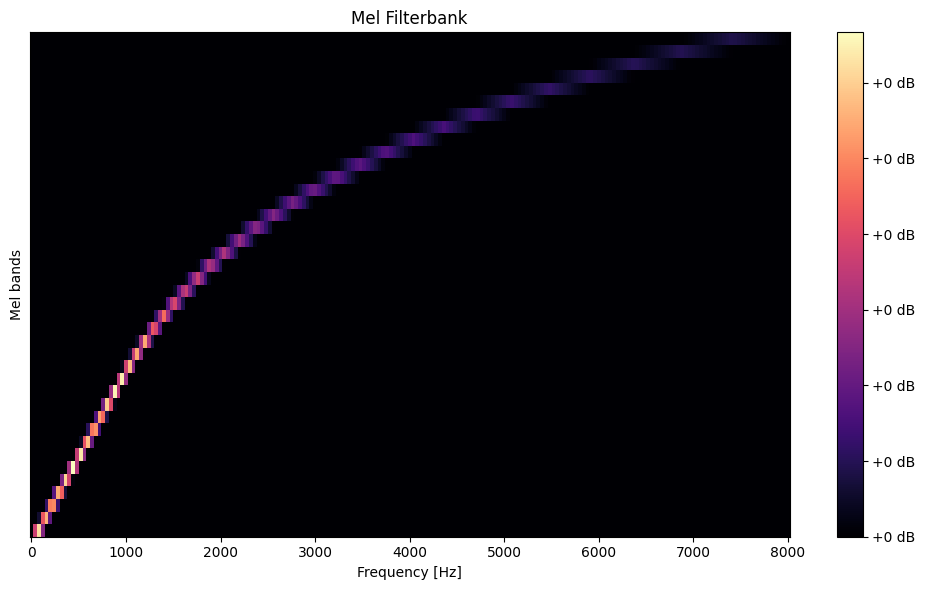

In [23]:
import librosa
import librosa.display
import matplotlib.pyplot as plt

# Generate a sample signal (e.g., a sine wave with added noise)
fs = sf  # Sampling frequency
duration = 1.0  # seconds
# t = np.linspace(0, duration, int(fs*duration), endpoint=False)  # Time array
x = signal # Sine wave

# Compute the Mel filterbank
n_mels = 40  # Number of Mel bands
n_fft = 400  # FFT window size
mel_filterbank = librosa.filters.mel(sr=fs, n_fft=n_fft, n_mels=n_mels)

# Plot the Mel filterbank
plt.figure(figsize=(10, 6))
librosa.display.specshow(mel_filterbank, sr=fs, x_axis='linear')
plt.colorbar(format='%+2.0f dB')
plt.title('Mel Filterbank')
plt.ylabel('Mel bands')
plt.xlabel('Frequency [Hz]')
plt.tight_layout()
plt.show()


In [24]:
0.01*16000

160.0

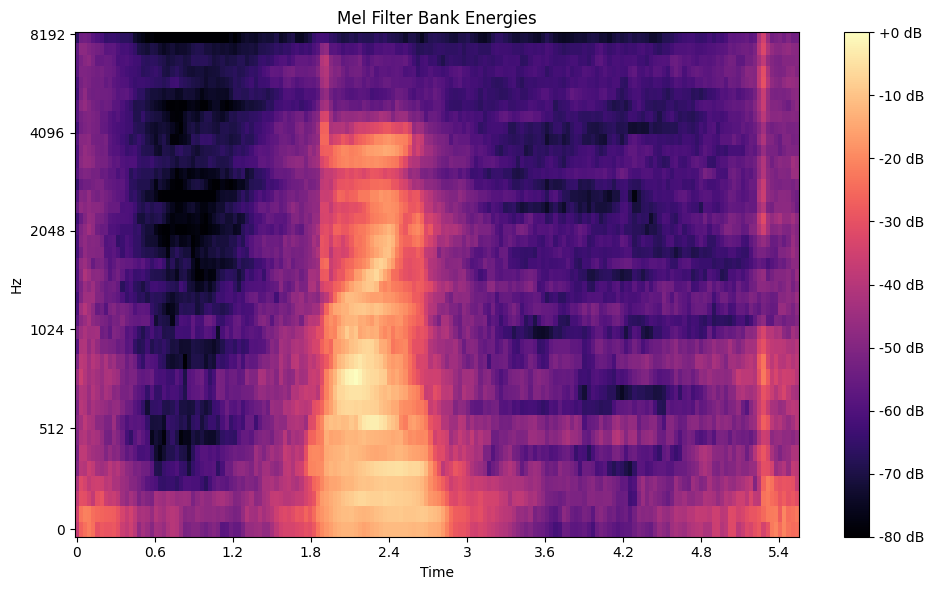

In [25]:
import numpy as np
import librosa
import librosa.display
import matplotlib.pyplot as plt

# Load a sample audio file
# You can replace this with any audio file path or use your own signal
y, sr = signal_cont,sf

# Compute the Mel spectrogram
n_mels = 40  # Number of Mel bands
S = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=n_mels,n_fft=512,hop_length=160)

# Convert to log scale (dB)
S_dB = librosa.power_to_db(S, ref=np.max)

# Plot the Mel filter bank energies
plt.figure(figsize=(10, 6))
librosa.display.specshow(S_dB, sr=sr, hop_length=512, x_axis='time', y_axis='mel')
plt.colorbar(format='%+2.0f dB')
plt.title('Mel Filter Bank Energies')
plt.tight_layout()
plt.show()


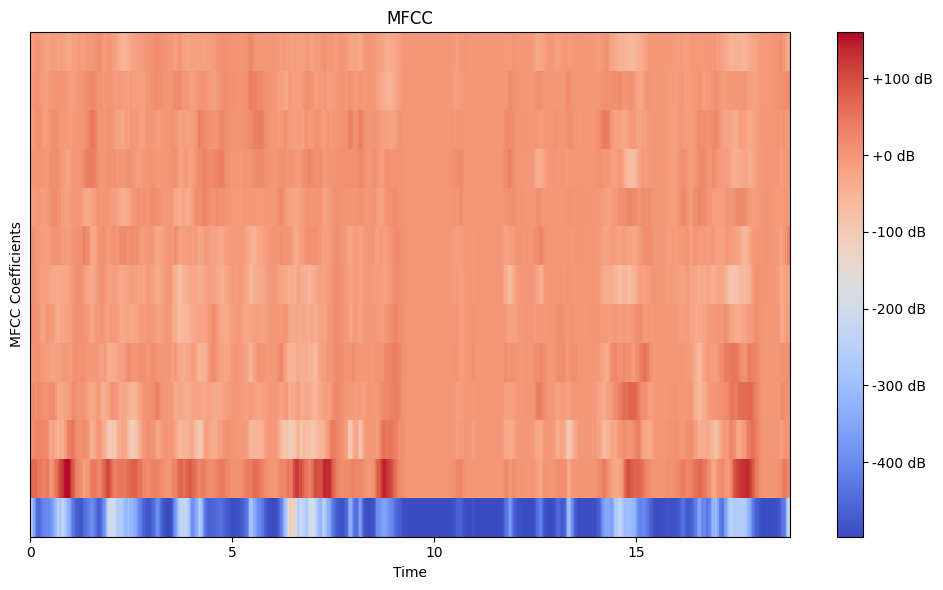

In [40]:
import numpy as np
import librosa
import librosa.display
import matplotlib.pyplot as plt

# Load a sample audio file
# Replace this with your own signal and sampling rate
y, sr = signal, sf

# Compute the MFCCs
n_mfcc = 13  # Number of MFCCs to return
mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=n_mfcc)

# Plot the MFCCs
plt.figure(figsize=(10, 6))
librosa.display.specshow(mfccs, sr=sr, x_axis='time')
plt.colorbar(format='%+2.0f dB')
plt.title('MFCC')
plt.ylabel('MFCC Coefficients')
plt.xlabel('Time')
plt.tight_layout()
plt.show()


In [27]:
import scipy.signal


stf = scipy.signal.stft(signal,sf)

In [28]:
stf

(array([   0. ,   62.5,  125. ,  187.5,  250. ,  312.5,  375. ,  437.5,
         500. ,  562.5,  625. ,  687.5,  750. ,  812.5,  875. ,  937.5,
        1000. , 1062.5, 1125. , 1187.5, 1250. , 1312.5, 1375. , 1437.5,
        1500. , 1562.5, 1625. , 1687.5, 1750. , 1812.5, 1875. , 1937.5,
        2000. , 2062.5, 2125. , 2187.5, 2250. , 2312.5, 2375. , 2437.5,
        2500. , 2562.5, 2625. , 2687.5, 2750. , 2812.5, 2875. , 2937.5,
        3000. , 3062.5, 3125. , 3187.5, 3250. , 3312.5, 3375. , 3437.5,
        3500. , 3562.5, 3625. , 3687.5, 3750. , 3812.5, 3875. , 3937.5,
        4000. , 4062.5, 4125. , 4187.5, 4250. , 4312.5, 4375. , 4437.5,
        4500. , 4562.5, 4625. , 4687.5, 4750. , 4812.5, 4875. , 4937.5,
        5000. , 5062.5, 5125. , 5187.5, 5250. , 5312.5, 5375. , 5437.5,
        5500. , 5562.5, 5625. , 5687.5, 5750. , 5812.5, 5875. , 5937.5,
        6000. , 6062.5, 6125. , 6187.5, 6250. , 6312.5, 6375. , 6437.5,
        6500. , 6562.5, 6625. , 6687.5, 6750. , 6812.5, 6875. , 

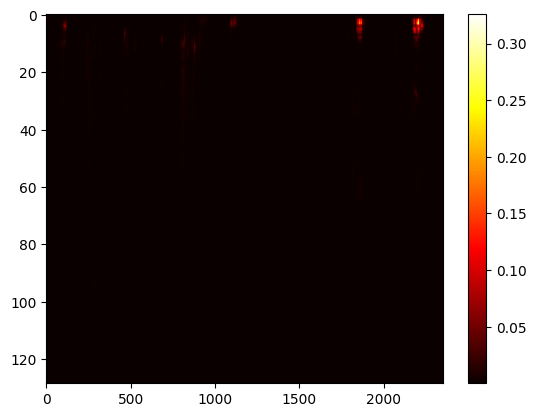

In [29]:
plt.figure()
plt.imshow(np.abs(stf[-1]),aspect='auto',cmap='hot')
plt.colorbar()
plt.show()
plt.close()

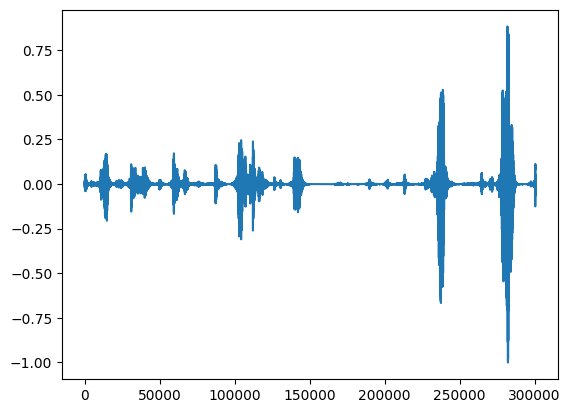

In [30]:
plt.plot(signal)

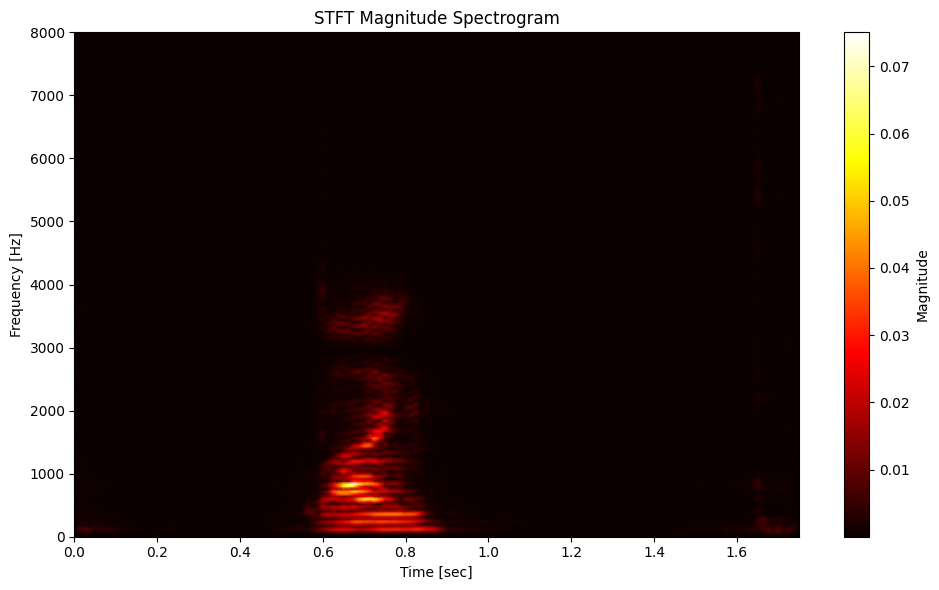

In [39]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import stft

# Generate a sample signal (e.g., a sine wave with added noise)
fs = sf  # Sampling frequency
# t = np.linspace(0, 1, fs, endpoint=False)  # Time array
f0 = 50  # Frequency of the sine wave
x = signal_cont

# Compute the STFT
f, t, Zxx = stft(x, fs=fs, nperseg=400)

# Plot the magnitude spectrogram
plt.figure(figsize=(10, 6))
plt.pcolormesh(t, f, np.abs(Zxx), shading='gouraud',cmap='hot')
plt.title('STFT Magnitude Spectrogram')
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.colorbar(label='Magnitude')
plt.tight_layout()
plt.show()


In [32]:
import preprocessing.preprocess as process

In [33]:
wrapper = process.piplineV1(data,{"filter_coeff":0.97,"frame_size":0.025,"frame_stride":0.01,"NFFT":512,"nfilt":40,"low_freq_mel":0})

In [34]:
wrapper[0]

(array([[-5.52628066e+02, -7.58982428e+01, -7.30650305e+00, ...,
         -3.66675783e+00, -1.03140153e+01, -6.89389933e+00],
        [-5.55825317e+02, -7.56805171e+01, -8.98721889e-01, ...,
         -2.46461383e+00, -1.68690963e+01, -1.18430493e+01],
        [-5.67341886e+02, -5.11130430e+01, -2.74086650e-01, ...,
         -9.35044761e+00, -9.59750281e+00, -2.66935008e+00],
        ...,
        [-6.36165683e+02, -9.81064385e+01, -1.34616611e+01, ...,
         -6.46732803e+00, -4.18547847e+01,  4.44774241e-01],
        [-6.03564341e+02, -9.31420717e+01, -5.52946237e-01, ...,
         -2.98845453e+00, -2.13728707e+01, -8.01992947e+00],
        [-4.54570294e+02, -1.35059486e+02, -2.42637615e+01, ...,
         -1.99391081e+01, -2.13030256e+01, -4.10769858e+00]]),
 16000,
 array([[-5.67216605e+02, -7.16374780e+01, -3.69925017e+00, ...,
          2.47626647e+00, -5.93576388e+00, -5.04588853e+00],
        [-5.74577801e+02, -7.45423001e+01,  3.20422624e+00, ...,
          1.26104005e+00, -1.3

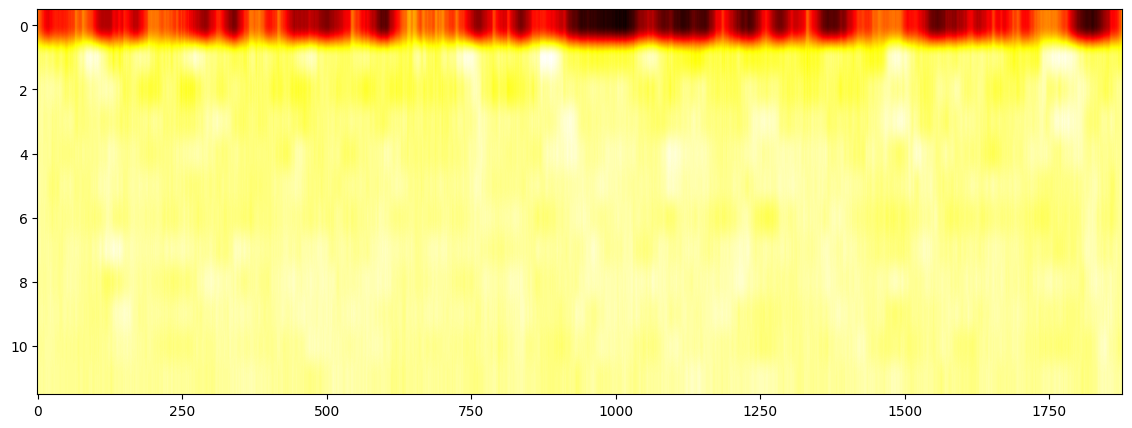

In [35]:
plt.figure(figsize=(14, 5))
plt.imshow(wrapper[0][0].T,aspect='auto',cmap="hot")

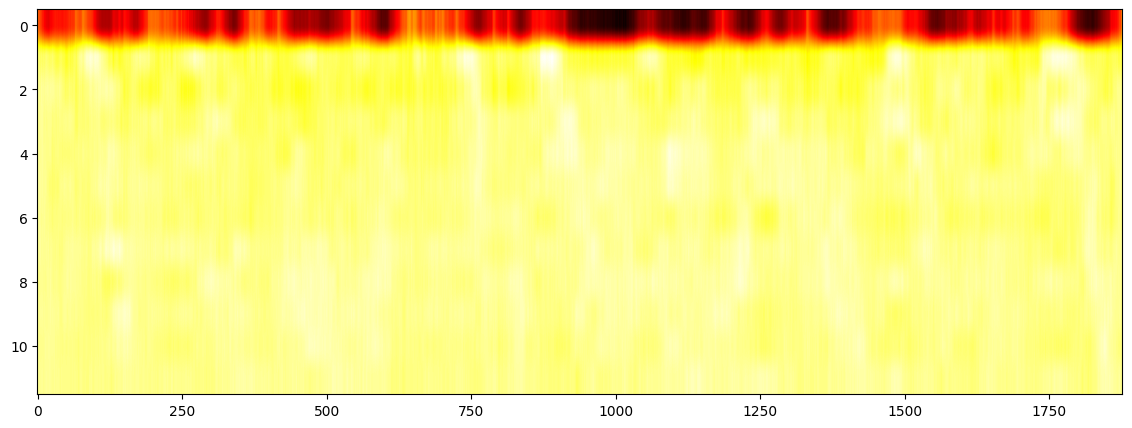

In [36]:
plt.figure(figsize=(14, 5))
plt.imshow(wrapper[0][2].T,aspect='auto',cmap="hot")

In [37]:
import numpy as np
import torch
import torchaudio
import torchaudio.transforms as T

# Example numpy array representing an audio signal
# Replace this with your actual numpy array
sample_rate = 16000  # Sample rate of the audio signal
audio_np = data[0][0]  # Generate a random audio signal

# Convert the numpy array to a PyTorch tensor
audio_tensor = torch.tensor(audio_np, dtype=torch.float32)

# Reshape the tensor if it is a 1-D array to a 2-D array with 1 channel
audio_tensor = audio_tensor.unsqueeze(0)

# Define the MelSpectrogram transform
mel_spectrogram = T.MelSpectrogram(
    sample_rate=sample_rate,
    n_fft=512,        # FFT window size
    win_length=400,   # Window size
    hop_length=1,   # Hop length
    n_mels=40         # Number of Mel bands
)

# Compute the Mel spectrogram
mel_spec = mel_spectrogram(audio_tensor)

# Convert the Mel spectrogram to a numpy array if needed
mel_spec_np = mel_spec.squeeze().numpy()

plt.figure(figsize=(14, 5))
plt.imshow(mel_spec_np*1000,aspect='auto',cmap="hot")



A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.0.2 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.

Traceback (most recent call last):  File "C:\Python310\lib\runpy.py", line 196, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "C:\Python310\lib\runpy.py", line 86, in _run_code
    exec(code, run_globals)
  File "c:\Users\siddh\Desktop\deep\.venv\lib\site-packages\ipykernel_launcher.py", line 18, in <module>
    app.launch_new_instance()
  File "c:\Users\siddh\Desktop\deep\.venv\lib\site-packages\traitlets\config\application.py", line 1075, in launch_instance
    app.start()
  File "c:\Users\siddh\Desktop\deep\.venv\lib\site-

RuntimeError: Numpy is not available

In [87]:
mel_spec_np

array([[9.84006748e-03, 9.84446891e-03, 9.85770673e-03, ...,
        7.02425122e-01, 7.02505827e-01, 7.02425063e-01],
       [2.97420491e-02, 2.97722742e-02, 2.98630688e-02, ...,
        4.69088346e-01, 4.68941391e-01, 4.69088316e-01],
       [7.06484020e-02, 7.07181022e-02, 7.09271953e-02, ...,
        1.01688004e+00, 1.01676512e+00, 1.01688004e+00],
       ...,
       [1.04348864e-02, 1.04372017e-02, 1.04441429e-02, ...,
        2.80228317e-01, 2.79945582e-01, 2.80228317e-01],
       [6.69691898e-03, 6.69816695e-03, 6.70191180e-03, ...,
        1.00125715e-01, 1.00016870e-01, 1.00125700e-01],
       [7.37502472e-04, 7.37714232e-04, 7.38347939e-04, ...,
        3.13558965e-03, 3.12929973e-03, 3.13558849e-03]], dtype=float32)